## Make a Hybrid Deep Learning Model$

### Part 1 - *Identify the Fraud with the Self-Organizing Map*

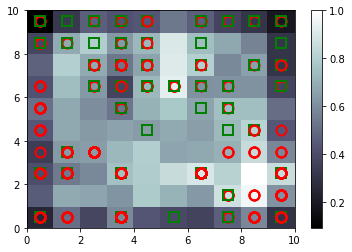

In [4]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing the dataset
dataset=pd.read_csv('Credit_Card_Applications.csv')
# dataset.head()
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
# y

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)#normalization
# X

# Training the SOM
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
# input_len=no of columns in X
# sigma=radius of the  NEIGHBOURHOOD
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
# winning node with highiest MID have white color and they are the outlier
# Winning node with lowest MID have dark color

markers=['o','s']
colors=['r','g']
# o for customer who dont get approval,
# s(square) for customer who  get approval
#r for customer who dont get approval,
# g for customer who  get approval
# i is the index of the customer(0,1,2......689)
# x is the corresponding vector of the customer(input features of the customer like A1,A2...A14)
# x is the X 
for i,x in enumerate(X):
    w=som.winner(x)#find the winning node for input customer
    plot(
        w[0]+0.5,#w[0] is X-coordinate
        w[1]+0.5,#w[1] is y-coordinate
        markers[y[i]],#value of y[i] is either 0 or 1
        markeredgecolor=colors[y[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2
        )
show()

In [9]:
# Finding the frauds
mappings=som.win_map(X)
# find the list of customers associated with the white winning nodes or fraud
frauds=np.concatenate((mappings[(8,1)],mappings[(5,6)],mappings[(6,2)]),axis=0)
frauds=sc.inverse_transform(frauds)
len(frauds)

54

### Part 2 - Going from Unsupervised to Supervised Deep Learning

In [25]:
# Creating the matrix of features
customers=dataset.iloc[:,1:].values#this is input for ann
# Creting the dependent variable
is_fraud=np.zeros(len(dataset))
for i in range (len(dataset)):
    if dataset.iloc[i,0] in frauds:#item in ith row first column
#finds the id of all the frauds and compare it with all the id from the dataset
#  if the id in the ith row of dataset is present in fraud then 1 else 0 
        is_fraud[i]=1#this is output for ann

customers.shape

(690, 15)

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [30]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 4)


Epoch 1/4
690/690 [==============================] - 1s 1ms/step - loss: 0.5029 - accuracy: 0.9217
Epoch 2/4
690/690 [==============================] - 1s 1ms/step - loss: 0.2295 - accuracy: 0.9217
Epoch 3/4
690/690 [==============================] - 1s 1ms/step - loss: 0.1639 - accuracy: 0.9217
Epoch 4/4
690/690 [==============================] - 1s 1ms/step - loss: 0.1382 - accuracy: 0.9217


###  *Predicting the probabilities of the Fraud*

In [36]:
y_pred = classifier.predict(customers)
y_pred=np.concatenate((dataset.iloc[:,0:1].values,y_pred),axis=1)
y_pred=y_pred[y_pred[:,1].argsort()]
y_pred

array([[1.56214230e+07, 3.26335430e-05],
       [1.57997850e+07, 1.74671412e-04],
       [1.57063940e+07, 8.79138708e-04],
       ...,
       [1.57525780e+07, 3.67055535e-01],
       [1.56099870e+07, 3.67055535e-01],
       [1.56471910e+07, 3.67055535e-01]])